## Custom Dataset

- `torchvision` for image
- `torchtext` for text
- `torchaudio` for audio
- `torchrec` for recommendation

In [120]:
import torch

In [121]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [122]:
## downloading dataset

import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"
image_path

PosixPath('data/pizza_steak_sushi')

### downloading data

folder structure

"/data/pizza_steak_sushi/train/pizza & steak & sushi"

"/data/pizza_steak_sushi/test/pizza & steak & sushi"

which contain image of respective food data

In [123]:
with open (data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

In [124]:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

In [125]:
## Data Preparation
import os

In [126]:
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [127]:
walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/test
There are 0 directories and 19 images in data/pizza_steak_sushi/test/steak
There are 0 directories and 25 images in data/pizza_steak_sushi/test/pizza
There are 0 directories and 31 images in data/pizza_steak_sushi/test/sushi
There are 3 directories and 0 images in data/pizza_steak_sushi/train
There are 0 directories and 75 images in data/pizza_steak_sushi/train/steak
There are 0 directories and 78 images in data/pizza_steak_sushi/train/pizza
There are 0 directories and 72 images in data/pizza_steak_sushi/train/sushi


In [128]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [129]:
## visualizing image

import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
img = Image.open(random_image_path)

Random image path: data/pizza_steak_sushi/train/pizza/702165.jpg
Image size: (512, 512)
Image mode: RGB


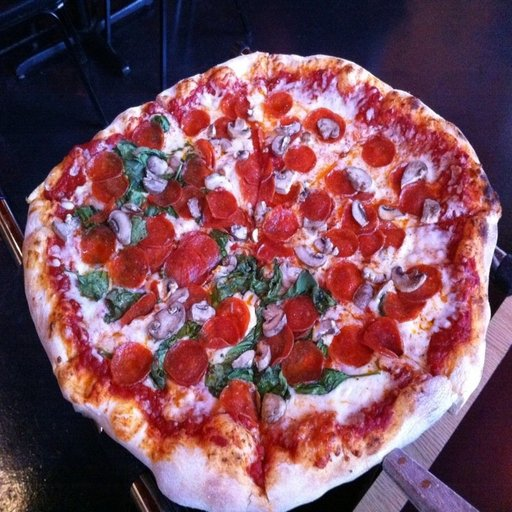

In [130]:
print(f"Random image path: {random_image_path}")
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
img

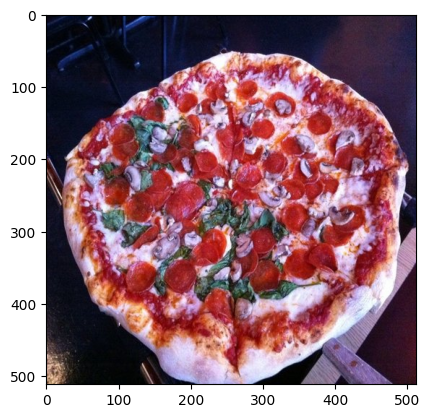

In [131]:
# using matplotlib
import matplotlib.pyplot as plt
import numpy as np

img_as_array = np.asarray(img)
plt.imshow(img_as_array)
plt.show()

In [132]:
img_as_array.shape # HWC

(512, 512, 3)

## Data Transformation (image to tensor)

In [133]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [134]:
# write a transform for image
data_transform = transforms.Compose([
    # resize image
    transforms.Resize((64, 64)),
    # augmentation
    transforms.RandomHorizontalFlip(p=0.7),
    # conver to tensor
    transforms.ToTensor() # convert PIL or np to tensor
])

In [135]:
data_transform_output = data_transform(img)
data_transform_output.shape

torch.Size([3, 64, 64])

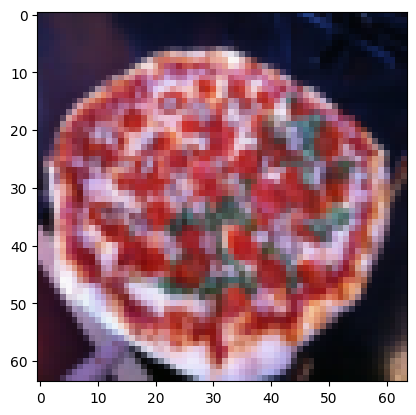

In [136]:
plt.imshow(data_transform_output.permute(1, 2, 0)) # want height, width , color format in matplotlib

In [137]:
def plot_transform_image(image_paths, transform, n=3):
  """select random image, transform and plot"""
  random_image_path = random.sample(image_paths, k=n)
  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \n Size: {f.size}")
      ax[0].axis("off")

      # transform image
      transformed_image = transform(f)
      ax[1].imshow(transformed_image.permute(1,2,0)) # HWC
      ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
      ax[1].axis("off")

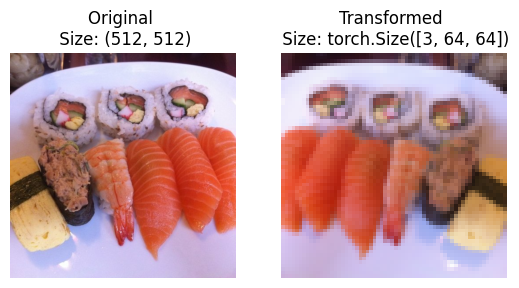

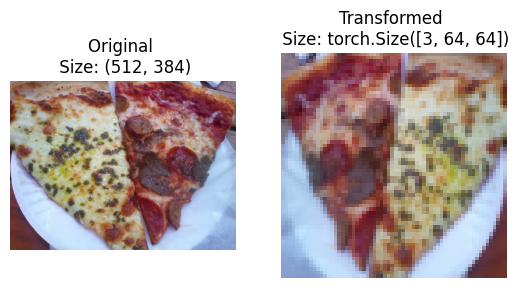

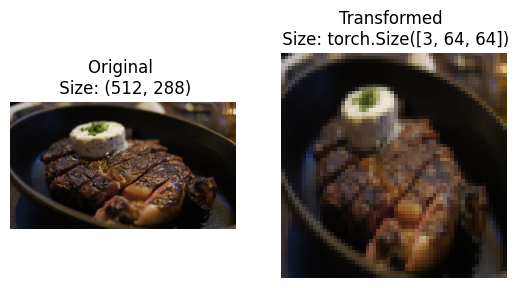

In [138]:
plot_transform_image(image_paths=image_path_list, transform=data_transform)

## Loading data using `ImageFolder`

In [139]:
from torchvision import datasets

train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transformation for the img
                                  target_transform=None) # label transfrom none
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform,
                                 target_transform=None)

In [140]:
train_data

Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.7)
               ToTensor()
           )

In [141]:
class_names = train_data.classes
class_with_label = train_data.class_to_idx

class_names, class_with_label

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [142]:
print(f"There are {len(train_data)} images in the training dataset")

print(f"There are {len(test_data)} images in the testing dataset")

There are 225 images in the training dataset
There are 75 images in the testing dataset


In [143]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [144]:
img, label = train_data[10][0], train_data[10][1]

Text(0.5, 1.0, 'Label: pizza')

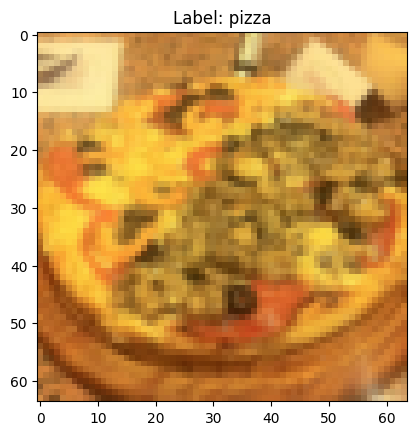

In [145]:
plt.imshow(img.permute(1,2,0)) # rearrange order of dimension
plt.title(f"Label: {class_names[label]}")

In [146]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_loader = DataLoader(dataset=train_data,
                          batch_size=BATCH_SIZE,
                          num_workers=os.cpu_count(),
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=BATCH_SIZE,
                         num_workers=os.cpu_count(),
                         shuffle=False)

In [147]:
train_loader

In [148]:
img, label = next(iter(train_loader))

In [149]:
img.shape, label # with batch size 1

(torch.Size([32, 3, 64, 64]),
 tensor([1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 0,
         1, 0, 2, 0, 1, 0, 0, 0]))

In [150]:
img, label = next(iter(train_loader))

In [151]:
img.shape, label # 32 batch

(torch.Size([32, 3, 64, 64]),
 tensor([2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0,
         0, 2, 2, 1, 2, 0, 2, 0]))

### Custom data loader


In [152]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [153]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}")

  class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [154]:
find_classes("./data/pizza_steak_sushi/train")

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [155]:
from torch.utils.data import Dataset

class DataFromDir(Dataset):
  # initialize
  def __init__(self,
               targ_dir: str,
               transform=None):

    # get all image path
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg")) # get all
    # transform
    self.transform = transform
    # class name
    self.classes, self.class_to_label = find_classes(targ_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_label[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

  # def find_classes(self, directory: str) -> Tuple[List[str], Dict[str, int]]:
  #   classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

In [156]:
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.7),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [157]:
train_data_custom = DataFromDir(targ_dir=train_dir,
                               transform=train_transform)

test_data_custom = DataFromDir(targ_dir=test_dir,
                               transform=test_transform)

In [158]:
train_data_custom.classes, train_data_custom.class_to_label

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Function to visualize

In [159]:
def display_random_images(
    dataset: torch.utils.data.Dataset,
    classes: List[str] = None,
    n: int = 10,
    display_shape: bool = True,
):
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purpose n shouldnt be greater than 10.")

  plt.figure(figsize=(16,9))

  random_samples_idx = random.sample(range(len(dataset)), k=n)
  for i, target_sample in enumerate(random_samples_idx):
    img, label = dataset[i][0], dataset[i][1]
    # get into right shape
    target_shape_image = img.permute(1,2,0)
    # create subplot for image
    plt.subplot(1, n, i + 1)
    plt.imshow(target_shape_image)
    if classes:
      plt.title(f"class: {classes[label]}")
    else:
      plt.title(f"class: {label}")
    plt.axis("off")


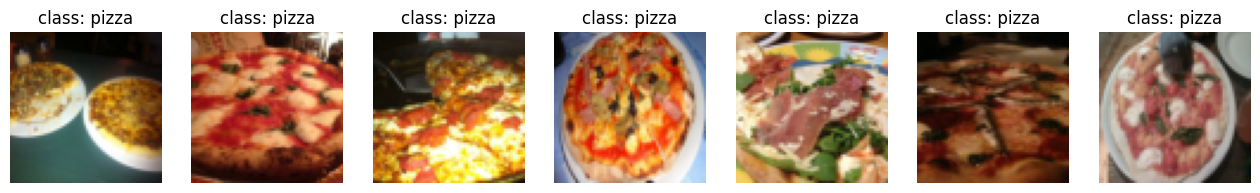

In [160]:
display_random_images(train_data,
                      n=7,
                      classes=class_names,
                      display_shape=True)

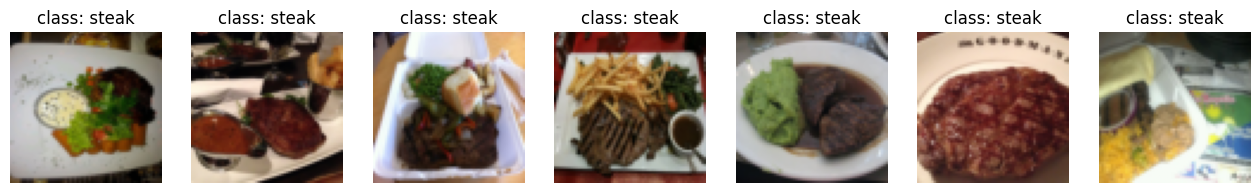

In [161]:
display_random_images(train_data_custom, # our own
                      n=7,
                      classes=class_names,
                      display_shape=True)

In [162]:
from torch.utils.data import DataLoader

train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    shuffle=False)

In [163]:
train_dataloader_custom

In [164]:
img_custom, label_custom = next(iter(train_dataloader_custom))

In [165]:
img_custom.shape

torch.Size([32, 3, 64, 64])

## Building Model

In [166]:
from torchvision import transforms

train_transform = transforms.Compose([
    # resize
    transforms.Resize((64, 64)),
    # augment
    # transforms.RandomHorizontalFlip(p=0.7),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    # convert
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [167]:
# get all image paths

image_path_list = list(image_path.glob("*/*/*.jpg"))
len(image_path_list)

300

In [168]:
image_path_list[0]

PosixPath('data/pizza_steak_sushi/test/steak/966174.jpg')

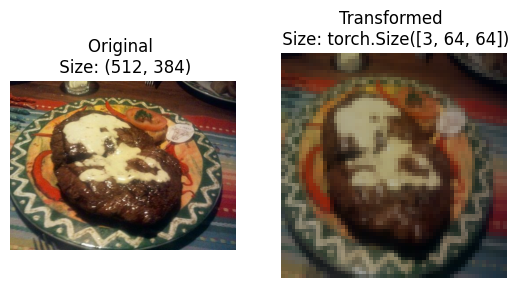

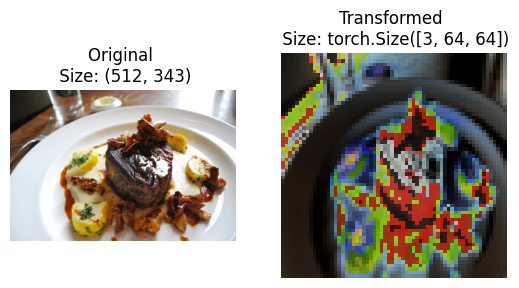

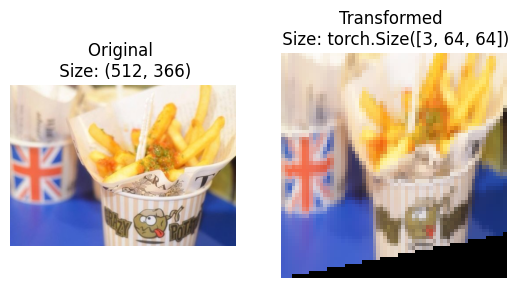

In [169]:
plot_transform_image(image_paths=image_path_list, transform=train_transform)

## Tiny VGG Model

In [170]:
# step
simple_transform = transforms.Compose([ # transform the image
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [171]:
# load and transform
from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)

# turn data into dataloaders
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                    batch_size=BATCH_SIZE,
                                    num_workers=os.cpu_count(),
                                    )

In [172]:
batch1 = list(next(iter(train_dataloader_simple)))[0]

batch1.shape

torch.Size([32, 3, 64, 64])

In [173]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        #  mat1 and mat2 shapes cannot be multiplied (32x3072 and 12x3)
        # 3072 / 12 / X * X : X = 16
        nn.Linear(in_features=hidden_units * 16 * 16,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    # print(f"Output of conv block 2 {x.shape}")
    # output is : 12 * 16 * 16
    x = self.classifier(x)
    # use operator fusion like
    # x = self.classifier(self.conv_block_2(self.conv_block_1(x)))
    return x

In [174]:
model_VGG = TinyVGG(
    input_shape=3, # 3 for the three color channel
    hidden_units=12,
    output_shape=len(class_names) # 3 in our 3 class dataset
).to(device)

In [175]:
model_VGG

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=3, bias=True)
  )
)

In [176]:
# forward propagation testing

image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape

torch.Size([32, 3, 64, 64])

In [177]:
model_VGG(image_batch.to(device)).shape

torch.Size([32, 3])

In [178]:
## TorchInfo package to get shape idea on model

!pip install torchinfo

In [179]:
from torchinfo import summary

summary(model_VGG,
        input_size=(32, 3, 64, 64),
        col_names=["input_size", "output_size", "num_params", "trainable"]
      )

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Trainable
TinyVGG                                  [32, 3, 64, 64]           [32, 3]                   --                        True
├─Sequential: 1-1                        [32, 3, 64, 64]           [32, 12, 32, 32]          --                        True
│    └─Conv2d: 2-1                       [32, 3, 64, 64]           [32, 12, 64, 64]          336                       True
│    └─ReLU: 2-2                         [32, 12, 64, 64]          [32, 12, 64, 64]          --                        --
│    └─Conv2d: 2-3                       [32, 12, 64, 64]          [32, 12, 64, 64]          1,308                     True
│    └─ReLU: 2-4                         [32, 12, 64, 64]          [32, 12, 64, 64]          --                        --
│    └─MaxPool2d: 2-5                    [32, 12, 64, 64]          [32, 12, 32, 32]          --                        --
├─Sequent

In [180]:
## Train and Test Loop

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device=device):
  # put the model in train mode
  model.train()

  # train loss and train acc
  train_loss, train_acc = 0, 0

  # loop through data loader through batch
  for batch, (X, y) in enumerate(dataloader):
    # send data to device
    X, y = X.to(device), y.to(device)

    # forward propagation
    y_pred = model(X)

    # loss calculation
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # optimizer zero grad
    optimizer.zero_grad()

    # backpropagation
    loss.backward()

    # optimizer step
    optimizer.step()

    # calculate train acc
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item() / len(y_pred)

  # adjust metrics to get average loss and acc
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [181]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # put model in eval mode
  model.eval()

  # setup loss and accuracy number
  test_loss, test_acc = 0, 0

  # turn on inference context manager
  with torch.inference_mode():
    # loop through dataloader
    for batch, (X, y) in enumerate(dataloader):
      # send data to device
      X, y = X.to(device), y.to(device)

      # forward propagation
      test_pred_logits = model(X)

      # calculate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # calculate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    # adjust metrics to get avg loss and accuracy per 32 size
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [182]:
# train function

from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):
  # result
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # loop through train and test
  for e in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # print
    print(f"Epoch: {e} : Train loss {train_loss} | Train acc {train_acc} | Test loss {test_loss} | Test acc {test_acc}")

    # update result
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

In [183]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_VGG.parameters(),
                             lr=0.01)

In [184]:
model_result = train(model=model_VGG,
                     train_dataloader=train_dataloader_simple,
                     test_dataloader=test_dataloader_simple,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 : Train loss 1.0980948209762573 | Train acc 0.4140625 | Test loss 1.1095467408498128 | Test acc 0.19791666666666666
Epoch: 1 : Train loss 1.0943654626607895 | Train acc 0.4140625 | Test loss 1.119513471921285 | Test acc 0.19791666666666666
Epoch: 2 : Train loss 1.0911663472652435 | Train acc 0.4140625 | Test loss 1.1288628975550334 | Test acc 0.19791666666666666
Epoch: 3 : Train loss 1.109112709760666 | Train acc 0.29296875 | Test loss 1.1094224850336711 | Test acc 0.19791666666666666
Epoch: 4 : Train loss 1.1028297692537308 | Train acc 0.29296875 | Test loss 1.096146782239278 | Test acc 0.19791666666666666
Epoch: 5 : Train loss 1.1054261773824692 | Train acc 0.29296875 | Test loss 1.10134752591451 | Test acc 0.19791666666666666
Epoch: 6 : Train loss 1.1005199402570724 | Train acc 0.296875 | Test loss 1.09077254931132 | Test acc 0.5416666666666666
Epoch: 7 : Train loss 1.0969378650188446 | Train acc 0.40234375 | Test loss 1.0824056069056194 | Test acc 0.5416666666666666
Epoch:

In [185]:
model_result

{'train_loss': [1.0980948209762573,
  1.0943654626607895,
  1.0911663472652435,
  1.109112709760666,
  1.1028297692537308,
  1.1054261773824692,
  1.1005199402570724,
  1.0969378650188446,
  1.1009287685155869,
  1.1025898456573486],
 'train_acc': [0.4140625,
  0.4140625,
  0.4140625,
  0.29296875,
  0.29296875,
  0.29296875,
  0.296875,
  0.40234375,
  0.28125,
  0.3671875],
 'test_loss': [1.1095467408498128,
  1.119513471921285,
  1.1288628975550334,
  1.1094224850336711,
  1.096146782239278,
  1.10134752591451,
  1.09077254931132,
  1.0824056069056194,
  1.0931247075398762,
  1.0984050432840984],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.5416666666666666,
  0.5416666666666666,
  0.5520833333333334,
  0.2916666666666667]}

## Plotting the result

In [186]:
import pandas as pd

data = pd.DataFrame(model_result)
data

train_loss  train_acc  test_loss  test_acc
0    1.098095   0.414062   1.109547  0.197917
1    1.094365   0.414062   1.119513  0.197917
2    1.091166   0.414062   1.128863  0.197917
3    1.109113   0.292969   1.109422  0.197917
4    1.102830   0.292969   1.096147  0.197917
5    1.105426   0.292969   1.101348  0.197917
6    1.100520   0.296875   1.090773  0.541667
7    1.096938   0.402344   1.082406  0.541667
8    1.100929   0.281250   1.093125  0.552083
9    1.102590   0.367188   1.098405  0.291667

In [187]:
def plot_loss_curves(results):
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15,7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.legend()
  plt.subplot(1,2,2)
  plt.plot(epochs, acc, label="train_acc")
  plt.plot(epochs, test_acc, label="test_acc")
  plt.title("Accuracy")
  plt.legend()
  plt.show()

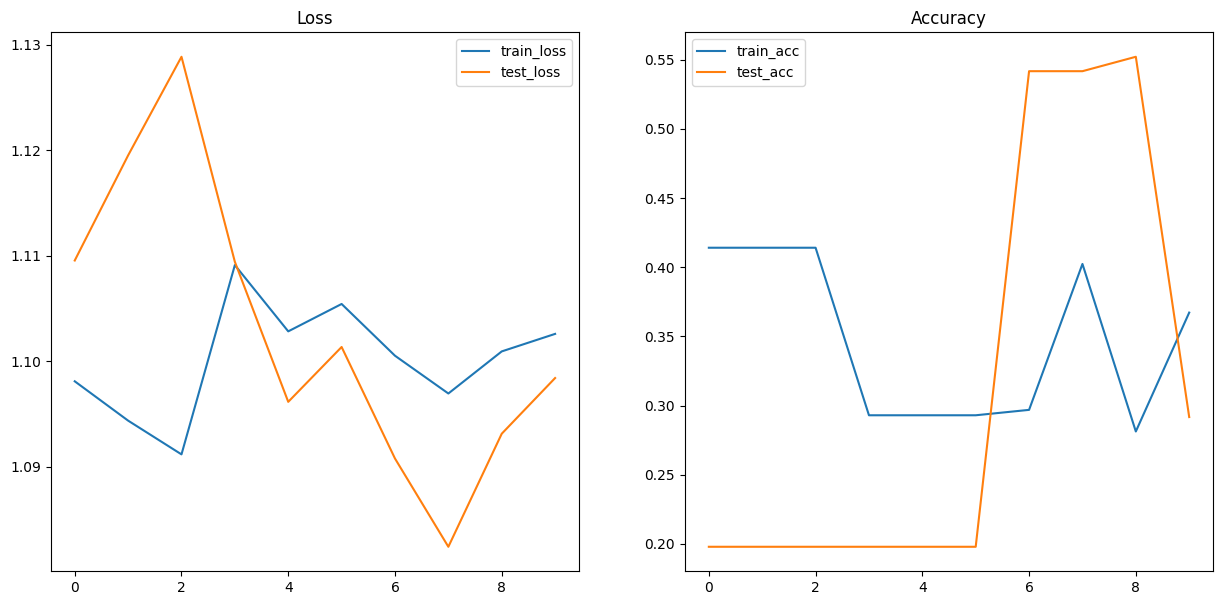

In [188]:
plot_loss_curves(model_result)

<Axes: >

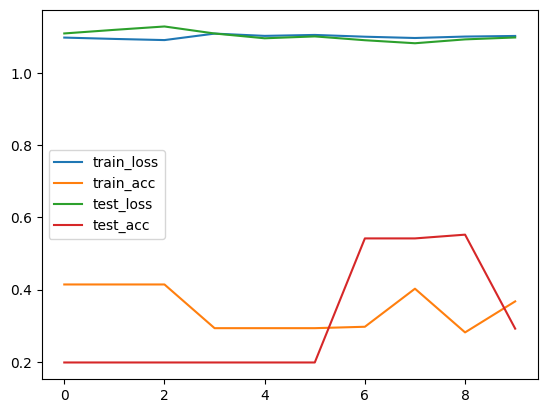

In [189]:
data.plot()

## Model with Data augmentation

In [190]:
# create transform with TrivialAugment
from torchvision import transforms
train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [191]:
# create train and test dataset with augmentation
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                          transform=train_transform_trivial)
test_data_augmented = datasets.ImageFolder(root=test_dir,
                                         transform=test_transform_trivial)

In [192]:
# data loader
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader_augmented = DataLoader(dataset=train_data_augmented,
                                        batch_size=BATCH_SIZE,
                                        num_workers=os.cpu_count(),
                                        shuffle=True)
test_dataloader_augmented = DataLoader(dataset=test_data_augmented,
                                       batch_size=BATCH_SIZE,
                                       num_workers=os.cpu_count())

In [193]:
list(next(iter(train_dataloader_augmented)))[0].shape

torch.Size([32, 3, 64, 64])

In [194]:
# constructing training model

model_1 = TinyVGG(input_shape=3,
                  hidden_units=12,
                  output_shape=len(train_data_augmented.classes)).to(device)

In [195]:
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=3, bias=True)
  )
)

In [196]:
torch.manual_seed(2)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss() # criterion, generalization
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_augmented,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 : Train loss 1.1003131568431854 | Train acc 0.3046875 | Test loss 1.1087429523468018 | Test acc 0.19791666666666666
Epoch: 1 : Train loss 1.0970833450555801 | Train acc 0.375 | Test loss 1.1172547737757366 | Test acc 0.19791666666666666
Epoch: 2 : Train loss 1.0996278375387192 | Train acc 0.29296875 | Test loss 1.1199804941813152 | Test acc 0.28125
Epoch: 3 : Train loss 1.106712892651558 | Train acc 0.26171875 | Test loss 1.1056980689366658 | Test acc 0.2604166666666667
Epoch: 4 : Train loss 1.1019879281520844 | Train acc 0.3046875 | Test loss 1.0953001578648884 | Test acc 0.5416666666666666


In [197]:
model_1_results

{'train_loss': [1.1003131568431854,
  1.0970833450555801,
  1.0996278375387192,
  1.106712892651558,
  1.1019879281520844],
 'train_acc': [0.3046875, 0.375, 0.29296875, 0.26171875, 0.3046875],
 'test_loss': [1.1087429523468018,
  1.1172547737757366,
  1.1199804941813152,
  1.1056980689366658,
  1.0953001578648884],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.28125,
  0.2604166666666667,
  0.5416666666666666]}

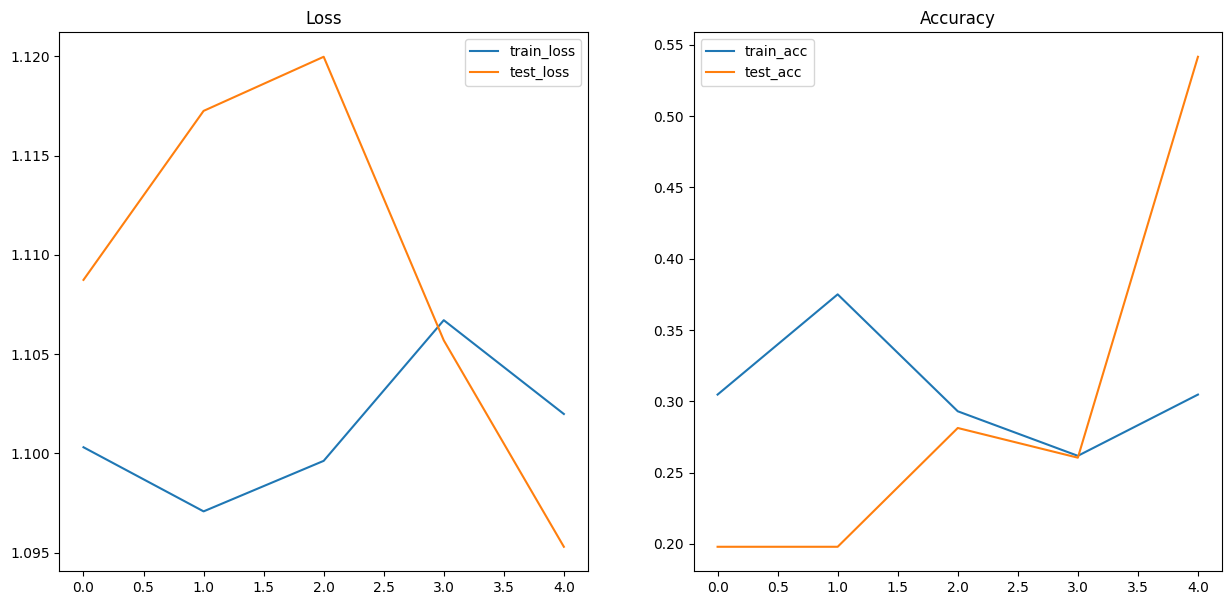

In [198]:
plot_loss_curves(model_1_results)

<Axes: >

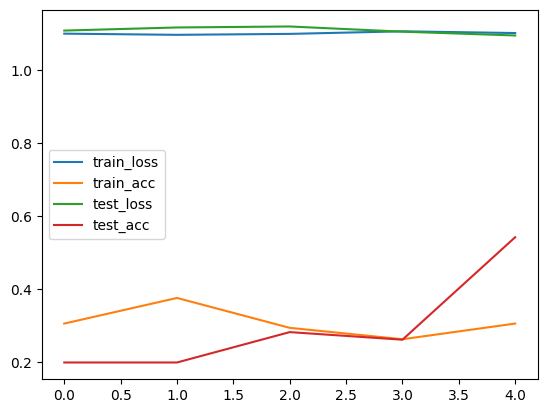

In [199]:
result = pd.DataFrame(model_1_results)
result.plot()

## Predicting on Our Custom Data

In [203]:
import requests

custom_image_path = "./pizza.jpeg"

req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza.jpeg")

with open(custom_image_path, "wb") as f:
  f.write(req.content)

In [204]:
import torchvision

In [209]:
image_path = image_path_list[0]

In [220]:
# read custom image
custom_image_uint8 = torchvision.io.read_image(
    custom_image_path
)
custom_image_uint8.shape

torch.Size([3, 183, 275])

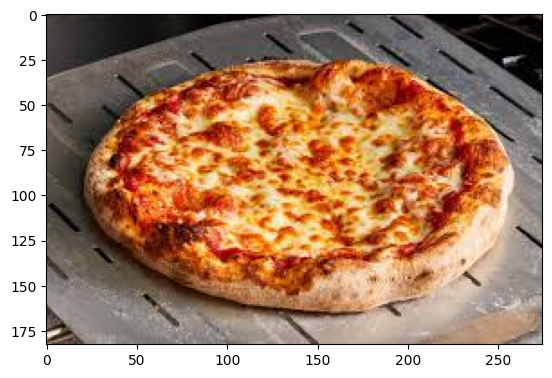

In [221]:
plt.imshow(custom_image_uint8.permute(1,2,0))

In [222]:
print(custom_image_uint8.dtype)

torch.uint8


In [223]:
custom_image_uint8[0]

tensor([[ 49,  50,  52,  ...,  48,  32,  14],
        [ 58,  59,  60,  ...,  70,  69,  68],
        [ 70,  70,  70,  ...,  51,  67,  82],
        ...,
        [189, 101,  39,  ..., 175, 180, 185],
        [ 41,  72, 113,  ..., 176, 174, 173],
        [145, 148, 148,  ..., 177, 176, 177]], dtype=torch.uint8)

In [234]:
custom_image =  torchvision.io.read_image(
    custom_image_path
).type(torch.float)/ 255
custom_image.dtype

torch.float32

In [238]:
custom_image.shape

torch.Size([3, 183, 275])

In [235]:
custom_image[:10]

tensor([[[0.1922, 0.1961, 0.2039,  ..., 0.1882, 0.1255, 0.0549],
         [0.2275, 0.2314, 0.2353,  ..., 0.2745, 0.2706, 0.2667],
         [0.2745, 0.2745, 0.2745,  ..., 0.2000, 0.2627, 0.3216],
         ...,
         [0.7412, 0.3961, 0.1529,  ..., 0.6863, 0.7059, 0.7255],
         [0.1608, 0.2824, 0.4431,  ..., 0.6902, 0.6824, 0.6784],
         [0.5686, 0.5804, 0.5804,  ..., 0.6941, 0.6902, 0.6941]],

        [[0.1725, 0.1765, 0.1843,  ..., 0.1333, 0.0627, 0.0000],
         [0.2078, 0.2118, 0.2157,  ..., 0.2275, 0.2157, 0.2118],
         [0.2549, 0.2549, 0.2549,  ..., 0.1608, 0.2157, 0.2745],
         ...,
         [0.6745, 0.3294, 0.0863,  ..., 0.6667, 0.6863, 0.7059],
         [0.0941, 0.2157, 0.3765,  ..., 0.6588, 0.6627, 0.6588],
         [0.5020, 0.5137, 0.5137,  ..., 0.6627, 0.6706, 0.6745]],

        [[0.1569, 0.1608, 0.1686,  ..., 0.0824, 0.0039, 0.0000],
         [0.1922, 0.1961, 0.2000,  ..., 0.1725, 0.1647, 0.1608],
         [0.2392, 0.2392, 0.2392,  ..., 0.1216, 0.1686, 0.

In [240]:
from torchvision import transforms
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64,64))
])

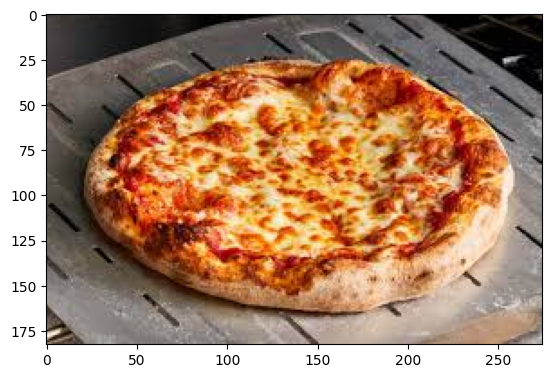

In [236]:
plt.imshow(custom_image.permute(1,2,0))

In [245]:
# off gradient
model_1.eval()
# transform
transformed_custom_image = custom_image_transform(custom_image)
print(f"Transformed custom image shape: {transformed_custom_image.shape}")
# batch size
transformed_custom_image = transformed_custom_image.unsqueeze(dim=0)
print(f"Transformed batch image: {transformed_custom_image.shape}")
# inference
with torch.inference_mode():
  pred_logit = model_1(transformed_custom_image.to(device))

Transformed custom image shape: torch.Size([3, 64, 64])
Transformed batch image: torch.Size([1, 3, 64, 64])


In [246]:
pred_logit

tensor([[ 0.0039, -0.0096,  0.0092]])

In [249]:
pred_probs = torch.softmax(pred_logit, dim=1)

In [248]:
pred_probs

tensor([[0.3342, 0.3298, 0.3360]])

In [250]:
predicted_class = class_names[torch.argmax(pred_probs)]
predicted_class

'sushi'

In [268]:
def predict_on_custom_image(model: torch.nn.Module,
                            image_path: str,
                            class_names: list):
  # read the image in tensor and normalize it
  image = torchvision.io.read_image(image_path).type(torch.float) / 255
  # transform the image shape
  resized_image = transforms.Compose([
      transforms.Resize(size=(64,64))
  ])
  # batch
  transformed_image = resized_image(image).unsqueeze(dim=0)
  # set to device
  final_image = transformed_image.to(device)
  # pred logits
  model.eval()
  with torch.inference_mode():
   pred_logit = model(final_image)
  #  print(pred_logit)
  pred_probs = torch.softmax(pred_logit, dim=1)
  pred_class = class_names[torch.argmax(pred_probs)]

  plt.imshow(image.permute(1,2,0))
  plt.title(f"Pred: {pred_class} | Prob: {torch.max(pred_probs)}")
  plt.axis(False)
  plt.show()


In [267]:
class_names

['pizza', 'steak', 'sushi']

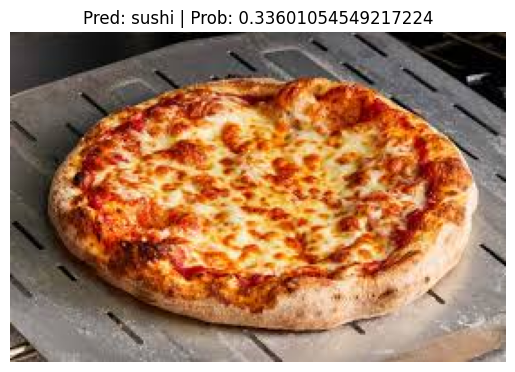

In [270]:
predict_on_custom_image(model_1, "./pizza.jpeg", class_names)